In [1]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import SVM
from test_data import TestLinear
import numpy as np
import matplotlib.pyplot as plt

Iteration 0: theta_star = 5.52757435088887
Iteration 0: Step length = 0.005527574350888872
Iteration 0: Difference between alpha updates = 11.986666666666657
Iteration 1: theta_star = 1.2976430162695498
Iteration 1: Step length = 0.007172818253341633
Iteration 1: Difference between alpha updates = 11.039349405122744
Iteration 2: theta_star = 37.8284258506971
Iteration 2: Step length = 0.1
Iteration 2: Difference between alpha updates = 5.156307811471558
Iteration 3: theta_star = 0.2915622898431248
Iteration 3: Step length = 0.02908610285546722
Iteration 3: Difference between alpha updates = 5.660742544347411
Iteration 4: theta_star = 0.936724566647625
Iteration 4: Step length = 0.01906704197483787
Iteration 4: Difference between alpha updates = 0.38699765501547195
Iteration 5: theta_star = 3.2383882462718168
Iteration 5: Step length = 0.06174648462248633
Iteration 5: Difference between alpha updates = 3.353808964909237
Iteration 6: theta_star = 1.7210827376752573
Iteration 6: Step leng

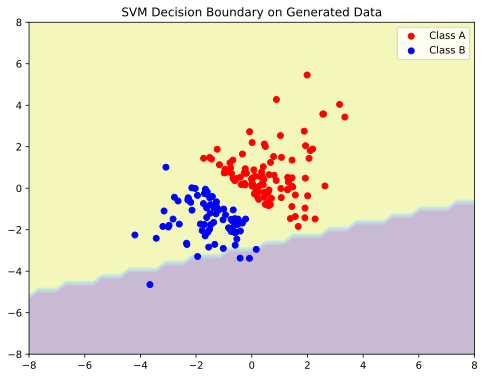

In [2]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 100
n_B = 80
margin = 0.5

listA, listB = TestLinear(w, b, n_A, n_B, margin)

# Convert lists to numpy arrays
X_A = np.array(listA)
X_B = np.array(listB)
X = np.vstack((X_A, X_B))
X = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + 1e-8)
y = np.hstack((np.ones(n_A), -np.ones(n_B)))  # Class A = +1, Class B = -1

# Train the SVM
svm = SVM(C=1.0, mode="dual")
svm.fit(X, y)

# Predict decision boundary
xx, yy = np.meshgrid(np.linspace(-8, 8, 50), np.linspace(-8, 8, 50))
Z = np.c_[xx.ravel(), yy.ravel()]
preds = svm.predict(Z).reshape(xx.shape)

# Plot the results
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, alpha=0.3)
plt.scatter(X_A[:, 0], X_A[:, 1], color="red", label="Class A")
plt.scatter(X_B[:, 0], X_B[:, 1], color="blue", label="Class B")
plt.legend()
plt.title("SVM Decision Boundary on Generated Data")
plt.show()
